# Seattle Airbnb Open Data

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

## Investigate the data

### Read the data from calendar.csv

In [2]:
calendar_df = pd.read_csv('../Downloads/archive/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### See the percentage of the missing values for each column

#### Here only the price column have mising values

In [3]:
df1_missing = calendar_df.isnull().mean()
df1_columns_missing = df1_missing[df1_missing > 0]
df1_columns_missing

price    0.32939
dtype: float64

### Read the data from listings.csv

In [4]:
listings_df = pd.read_csv('../Downloads/archive/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### See the percentage of the missing values for each column

#### Many columns have mising values, the license column is completly empty

In [5]:
df2_missing = listings_df.isnull().mean()
df2_columns_missing = df2_missing[df2_missing > 0]
df2_columns_missing

summary                        0.046359
space                          0.149031
neighborhood_overview          0.270299
notes                          0.420639
transit                        0.244631
thumbnail_url                  0.083814
medium_url                     0.083814
xl_picture_url                 0.083814
host_name                      0.000524
host_since                     0.000524
host_location                  0.002095
host_about                     0.224987
host_response_time             0.136983
host_response_rate             0.136983
host_acceptance_rate           0.202462
host_is_superhost              0.000524
host_thumbnail_url             0.000524
host_picture_url               0.000524
host_neighbourhood             0.078575
host_listings_count            0.000524
host_total_listings_count      0.000524
host_has_profile_pic           0.000524
host_identity_verified         0.000524
neighbourhood                  0.108958
zipcode                        0.001833


#### Get the number of unique values in each column

In [6]:
df2_unique = listings_df.T.apply(lambda x: x.nunique(), axis=1)
for i in range(len(df2_unique)):
    print(listings_df.columns[i], df2_unique[i])

id 3818
listing_url 3818
scrape_id 1
last_scraped 1
name 3792
summary 3478
space 3119
description 3742
experiences_offered 1
neighborhood_overview 2506
notes 1999
transit 2574
thumbnail_url 3498
medium_url 3498
picture_url 3818
xl_picture_url 3498
host_id 2751
host_url 2751
host_name 1466
host_since 1380
host_location 120
host_about 2011
host_response_time 4
host_response_rate 45
host_acceptance_rate 2
host_is_superhost 2
host_thumbnail_url 2743
host_picture_url 2743
host_neighbourhood 102
host_listings_count 27
host_total_listings_count 27
host_verifications 116
host_has_profile_pic 2
host_identity_verified 2
street 1442
neighbourhood 81
neighbourhood_cleansed 87
neighbourhood_group_cleansed 17
city 7
state 2
zipcode 28
market 1
smart_location 7
country_code 1
country 1
latitude 3818
longitude 3818
is_location_exact 2
property_type 16
room_type 3
accommodates 15
bathrooms 12
bedrooms 8
beds 11
bed_type 5
amenities 3284
square_feet 47
price 273
weekly_price 395
monthly_price 356
securi

#### We need to drop the columns that does not help us in answering the question we are interested in
1- Drop since they are irrelevant to our questions:

host_id, host_location, host_acceptance_rate, host_neighbourhood, host_total_listings_count, host_url, host_name, host_about, host_thumbnail_url, host_picture_url, host_listings_count, calculated_host_listings_count, calendar_updated, listing_url, name, zipcode, xl_picture_url, has_availability, availability_30, id, availability_60, availability_90, availability_365, first_review, last_review, reviews_per_month, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, host_verifications,review_scores_communication, review_scores_location, review_scores_value, amenities, thumbnail_url, medium_url, picture_url


2- Drop since we already have similar attribute: 

weekly_price, monthly_price we have the price

neighbourhood, neighbourhood_cleansed, smart_location, latitude, longitude, zipcode we have neighbourhood_group_cleansed


3- Drop since they are very descriptive (can not help with our questions)

summary, space, description, neighborhood_overview, notes, transit


4- Drop since they all contain the same value:

license, scrape_id, last_scraped, experiences_offered, market, country_code, country, has_availability, calendar_last_scraped, requires_license, jurisdiction_names, city, state


In [7]:
listings_df = listings_df.drop(columns = ['host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30', 'id',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names',
                  'reviews_per_month', 'host_listings_count', 'calculated_host_listings_count',
                   'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'host_verifications',
                   'review_scores_communication', 'review_scores_location', 'review_scores_value', 'street', 'amenities'])

### Prepare the data of calendar for Questions

#### We need to get the year and month as numbers from the date column

In [8]:
def get_value_from_date(example, value, col):
    '''
        functions takes:
        every row in dataframe, 
        the column we want to process (string in a format of date)
        the value (whether it is month or year)

        and returns:
        integer that represents the month or year
    '''
    if(value == 'month'):
        return int(example[col].split('-')[1])
    else: 
        return int(example[col].split('-')[0])


calendar_df['month'] = calendar_df.apply(lambda example: get_value_from_date(example, 'month', 'date'),axis=1)
calendar_df['year'] = calendar_df.apply(lambda example: get_value_from_date(example, 'year', 'date'),axis=1)

#### We need to convert the price column from string to int and fill the null values with the mean

In [9]:
calendar_df['price'] = ((calendar_df['price'].astype(str)).str.replace("$", "")).str.replace(",", "").astype("float")
calendar_df['price'].fillna(calendar_df['price'].mean(), inplace = True)

/tmp/ipykernel_84539/3654990882.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['price'] = ((calendar_df['price'].astype(str)).str.replace("$", "")).str.replace(",", "").astype("float")


In [10]:
calendar_df

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.000000,1,2016
1,241032,2016-01-05,t,85.000000,1,2016
2,241032,2016-01-06,f,137.944859,1,2016
3,241032,2016-01-07,f,137.944859,1,2016
4,241032,2016-01-08,f,137.944859,1,2016
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,137.944859,12,2016
1393566,10208623,2016-12-30,f,137.944859,12,2016
1393567,10208623,2016-12-31,f,137.944859,12,2016
1393568,10208623,2017-01-01,f,137.944859,1,2017


## Question one: Busiest time of the year to visit Seattle? by how much do prices spike? 

### Part one: Busiest time of the year to visit Seattle?

##### To adress this question, we first need to get all available listings for each month, then plot the month against the number of bookings

In [49]:
available_listings_per_month = []

#year 2017 only contains data from  January
for i in range(0, 12):
    available_listings_per_month.append(len(calendar_df[(calendar_df['month'] == (i+1)) & (calendar_df['available'] == 'f') & (calendar_df['year'] == 2016)]))

##### We can see that people tend to book in January and July

In [50]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

#plot
Q1_pt1 = pd.concat([pd.DataFrame(months, columns=['Month']),
                pd.DataFrame(available_listings_per_month, columns=['Number of bookings'])], 
                    axis=1)

fig = px.line(Q1_pt1, x="Month", y="Number of bookings", title='Number of bookings per month', markers=True)
fig.data[0].line.color = 'indianred'
fig.show()
#pio.write_image(fig, "images/Number of bookings per month.png")

##### But what season does people usually tavel in? first we need to get the percentage of each month and then plot it

In [12]:
total = Q1_pt1['Number of bookings'].sum()
percentage = (Q1_pt1['Number of bookings'] / total) * 100

In [13]:
season = ['Winter', 'Spring', 'Summer', 'Autumn']

In [14]:
percent = [percentage[0]+percentage[1]+percentage[11],
           percentage[2]+percentage[3]+percentage[4],
           percentage[5]+percentage[6]+percentage[7],
           percentage[8]+percentage[9]+percentage[10]]

In [15]:
ss = pd.concat([pd.DataFrame(season, columns=['Season']),
                pd.DataFrame(percent, columns=['Percentage'])], 
                    axis=1)

##### It is clear that most people would rather travel during the summer than during any other season.

In [16]:
fig = px.bar(ss, x='Season', y='Percentage', color_discrete_sequence=['indianred'])
 
       
fig.update_layout(
    title=('Percentage of Bookings per Season'),
    xaxis_title=('Season'), 
    yaxis_title='Percentage',
    hovermode="x unified",width=1800,height=700
)
   
fig.show()
#pio.write_image(fig,"images/Percentage of Bookings per Season.png")

### Part two: By how much do prices spike? 

##### To ansewr this questions, we need to find average price per month

In [17]:
#find average price per month
average_price_per_month = calendar_df.groupby(['month'])['price'].mean()

#plot
Q1_pt2 = pd.concat([pd.DataFrame(months, columns=['Month']),
                pd.DataFrame(average_price_per_month.values, columns=['Average price $'])], 
                    axis=1)

fig = px.line(Q1_pt2, x="Month", y="Average price $", title='Average price per month', markers=True)
fig.data[0].line.color = 'indianred'
fig.show()
#pio.write_image(fig,"images/Average price per month.png")

##### Here we can see that prices also tend to spike greatly in the summer, and it reaches its cheapest during January and February.

##### We may draw the conclusion that while summer travel is the most popular time for travelers to visit Seattle, winter travel is also very popular because of the low cost of living.

## Question two: What is the most expensive neighborhood in Seattle and what is the one with the highest quality? 

### Part one: What is the most expensive neighborhood in Seattle?

##### To address this, we first need to get the list of unique  neighbourhoods, then find the average price for each neighbourhood to make the plot

In [18]:
neighbourhoods = listings_df['neighbourhood_group_cleansed'].unique()
len(neighbourhoods)

17

In [19]:
#convert price from string to int and fill null values with the mean
listings_df['price'] = ((listings_df['price'].astype(str)).str.replace("$", "")).str.replace(",", "").astype("float")

/tmp/ipykernel_84539/3119978582.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [20]:
price_per_neighbourhood = pd.DataFrame(columns =['Neighbourhood', 'Price'])
price_per_neighbourhood['Neighbourhood'] = neighbourhoods

for i in range(len(neighbourhoods)):
    price_per_neighbourhood['Price'][i] = listings_df[(listings_df['neighbourhood_group_cleansed'] == price_per_neighbourhood['Neighbourhood'][i])]['price'].mean()

price_per_neighbourhood

,Neighbourhood,Price
0,Queen Anne,157.223729
1,Ballard,124.682609
2,Other neighborhoods,119.968514
3,Cascade,140.101124
4,Central Area,128.338753
5,University District,93.639344
6,Downtown,154.40566
7,Magnolia,177.672131
8,West Seattle,141.359606
9,Interbay,109.727273


#### You can see in the graph below that Magnolia by far is the most expensive one, along with Queen Anne and Downtown.

In [21]:
fig = px.bar(price_per_neighbourhood, x='Neighbourhood', y='Price', color_discrete_sequence=['indianred'])
 
       
fig.update_layout(
    title=('Price per neighbourhood'),
    xaxis_title=('Neighbourhood'), 
    yaxis_title='Price',
    hovermode="x unified",width=1800,height=700
)
   
fig.show()
#pio.write_image(fig,"images/Price per neighbourhood.png")

### Part two: What is the neighborhood with the highest review scores? 

#### Fisrt we need to fill missing values in review_scores_rating with the mean, then get the average Review Scores Rating for each neighbourhood

In [22]:
#fill missing values with mean (since it is numbers)
listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].mean(), inplace = True)

In [23]:
scores_per_neighbourhood = pd.DataFrame(columns =['Neighbourhood', 'Review Scores Rating'])
scores_per_neighbourhood['Neighbourhood'] = neighbourhoods

for i in range(len(neighbourhoods)):
    scores_per_neighbourhood['Review Scores Rating'][i] = listings_df[(listings_df['neighbourhood_group_cleansed'] == scores_per_neighbourhood['Neighbourhood'][i])]['review_scores_rating'].mean()

scores_per_neighbourhood

,Neighbourhood,Review Scores Rating
0,Queen Anne,95.292962
1,Ballard,95.373707
2,Other neighborhoods,94.558461
3,Cascade,93.021823
4,Central Area,95.810198
5,University District,89.737876
6,Downtown,94.039444
7,Magnolia,93.959831
8,West Seattle,95.5966
9,Interbay,93.916229


##### We can see that the neighbourhood might not have a significant impact on Review Scores Rating, since its all in the same range

In [24]:
fig = px.bar(scores_per_neighbourhood, x='Neighbourhood', y='Review Scores Rating', color_discrete_sequence=['indianred'])
 
       
fig.update_layout(
    title=('Review Scores Rating per neighbourhood'),
    xaxis_title=('Neighbourhood'), 
    yaxis_title='Review Scores Rating',
    hovermode="x unified",width=1800,height=700
)
   
fig.show()
#pio.write_image(fig,"images/Review Scores Rating per neighbourhood.png")

## Clean The data for Correlation

### 1- Fill in missing values
### 2- Convert number from string to int/float
### 3- Convert binary/categorical values into numerical

In [25]:
df = listings_df

In [26]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [27]:
df_missing = df.isnull().mean()
columns_missing = df_missing[df_missing > 0]
columns_missing

host_since                0.000524
host_response_time        0.136983
host_response_rate        0.136983
host_is_superhost         0.000524
host_has_profile_pic      0.000524
host_identity_verified    0.000524
property_type             0.000262
bathrooms                 0.004191
bedrooms                  0.001572
beds                      0.000262
security_deposit          0.511262
cleaning_fee              0.269775
dtype: float64

In [28]:
#convert host_response_rate into numbers instade of percentages and fill missing values with mean (since it is numbers)
df['host_response_rate'] = (df['host_response_rate'].astype(str)).str.replace("%", "").astype("float")
df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace = True)

In [29]:
#fill missing values with mode (since it is years) and convert host_since date into int instade of string
df['host_since'].fillna(df['host_since'].mode()[0], inplace = True)
df['host_since'] = df.apply(lambda example: get_value_from_date(example, 'year', 'host_since'),axis=1)

In [30]:
#extract the values as numbers
df['extra_people'] = (df['extra_people'].astype(str)).str.replace("$", "").astype("float")

/tmp/ipykernel_84539/1339976217.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [31]:
#remove missing values for bathrooms, bedrooms and beds (since it has low percentages of nulls)
df = df.dropna(subset=['bathrooms'])
df = df.dropna(subset=['bedrooms'])
df = df.dropna(subset=['beds'])

In [32]:
def turn_to_float(example, column):
    '''
        functions takes:
        every row in dataframe, 
        the column we want to process (string in a format of number)

        and returns:
        float that represents the number
    '''
    try:
        num = float(example[column])
    except:
        num = np.nan
        
    return num

In [33]:
#convert security_deposit into numbers and fill missing values with mean (since it is numbers)
df['security_deposit'] = (df['security_deposit'].astype(str)).str.replace(",", "")
df['security_deposit'] = (df['security_deposit'].astype(str)).str.replace("$", "")
df['security_deposit'] = df.apply(lambda example: turn_to_float(example, 'security_deposit'), axis=1)
df['security_deposit'].fillna(df['security_deposit'].mean(), inplace = True)

/tmp/ipykernel_84539/3668568972.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [34]:
#convert cleaning_fee into numbers and fill missing values with mean (since it is numbers)
df['cleaning_fee'] = (df['cleaning_fee'].astype(str)).str.replace(",", "")
df['cleaning_fee'] = (df['cleaning_fee'].astype(str)).str.replace("$", "")
df['cleaning_fee'] = df.apply(lambda example: turn_to_float(example, 'cleaning_fee'), axis=1)
df['cleaning_fee'].fillna(df['cleaning_fee'].mean(), inplace = True)

/tmp/ipykernel_84539/2858872002.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [35]:
def room_type(example):
    '''
        functions takes:
        every row in dataframe,

        and returns:
        an integer that represents the room_type, 1 for Entire home/apt, 0.5 for Private room, 0 for Shared room
    '''
    if(example['room_type']=='Entire home/apt'):
        return 1
    
    if(example['room_type']=='Private room'):
        return 0.5
    
    if(example['room_type']=='Shared room'):
        return 0

#turn categorical data to numbers
df['room_type'] = df.apply(lambda example: room_type(example), axis=1)

In [36]:
def bed_type(example):
    '''
        functions takes:
        every row in dataframe,

        and returns:
        an integer that represents the bed_type, 1 for Real Bed, 0.75 for Airbed, 0.5 for Pull-out Sofa, 0.25 for Futon, 0 for Couch
    '''
    if(example['bed_type']=='Real Bed'):
        return 1
    
    if(example['bed_type']=='Airbed'):
        return 0.75
    
    if(example['bed_type']=='Pull-out Sofa'):
        return 0.50
    
    if(example['bed_type']=='Futon'):
        return 0.25
    
    if(example['bed_type']=='Couch'):
        return 0

#turn categorical data to numbers
df['bed_type'] = df.apply(lambda example: bed_type(example), axis=1)

In [37]:
def cancellation_policy(example):
    '''
        functions takes:
        every row in dataframe,

        and returns:
        an integer that represents the cancellation_policy, 1 for flexible, 0.5 for moderate, 0 for strict
    '''
    
    if(example['cancellation_policy']=='flexible'):
        return 1
    
    if(example['cancellation_policy']=='moderate'):
        return 0.5
    
    if(example['cancellation_policy']=='strict'):
        return 0

#turn categorical data to numbers
df['cancellation_policy'] = df.apply(lambda example: cancellation_policy(example), axis=1)

In [38]:
def host_response_time(example):
    '''
        functions takes:
        every row in dataframe,

        and returns:
        an integer that represents the host_response_time, 1 for within an hour, 0.75 for within a few hours, 0.5 for within a day,0.25 for a few days or more
    '''

    if(example['host_response_time']=='within an hour'):
        return 1
    
    if(example['host_response_time']=='within a few hours'):
        return 0.75
    
    if(example['host_response_time']=='within a day'):
        return 0.50
    
    if(example['host_response_time']=='a few days or more'):
        return 0.25

#turn categorical data to numbers and fill missing values with mode (since it is time)
df['host_response_time'] = df.apply(lambda example: host_response_time(example), axis=1)
df['host_response_time'].fillna(df['host_response_time'].mode()[0], inplace = True)

In [39]:
#remove missing values for property_type (since it has low percentage of nulls)
df = df.dropna(subset=['property_type'])

In [40]:
def binary(example, col):
    '''
        functions takes:
        every row in dataframe,
        the column we want to process

        and returns:
        an integer that represents the column, 1 for true, 0 for false
    '''
    if(example[col]=='t'):
        return 1
    else: return 0

#turn binary data to numbers
df['host_is_superhost'] = df.apply(lambda example: binary(example, 'host_is_superhost'), axis=1)
df['host_has_profile_pic'] = df.apply(lambda example: binary(example, 'host_has_profile_pic'), axis=1)
df['host_identity_verified'] = df.apply(lambda example: binary(example, 'host_identity_verified'), axis=1)
df['instant_bookable'] = df.apply(lambda example: binary(example, 'instant_bookable'), axis=1)
df['require_guest_profile_picture'] = df.apply(lambda example: binary(example, 'require_guest_profile_picture'), axis=1)
df['require_guest_phone_verification'] = df.apply(lambda example: binary(example, 'require_guest_phone_verification'), axis=1)

In [41]:
#fill missing values with mode (since it is binary)
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace = True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace = True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace = True)

In [42]:
df_missing = df.isnull().mean()
columns_missing = df_missing[df_missing > 0]
columns_missing

Series([], dtype: float64)

In [43]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [44]:
#Create dummy columns for all the categorical variables in df, drop the original columns
b = df.select_dtypes('object')
for col in  b.columns:
    #for each cat add dummy var, drop original column
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [45]:
df = df.drop(columns=['property_type_nan', 'neighbourhood_group_cleansed_nan'])

In [46]:
df

,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms,bedrooms,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,2011,0.75,96.000000,0,1,1,1.0,4,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,1.00,98.000000,1,1,1,1.0,4,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.75,67.000000,0,1,1,1.0,11,4.5,5.0,...,0,0,0,1,0,0,0,0,0,0
3,2013,1.00,94.886798,0,1,1,1.0,3,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,1.00,100.000000,0,1,1,1.0,6,2.0,3.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2015,0.75,99.000000,0,1,1,1.0,6,2.0,3.0,...,0,0,0,1,0,0,0,0,0,0
3814,2015,1.00,100.000000,0,1,1,1.0,4,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3815,2015,1.00,94.886798,0,1,0,1.0,2,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3816,2015,1.00,100.000000,0,1,1,1.0,2,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0


###

## Question three: What is the feature that has the biggest effect on the price? 

##### To answer this, we cleand the data and prepared it for the correlation heat map, here we made a correlation heat map for every attribute wuth the other, the birghter the color the more the attributes are related

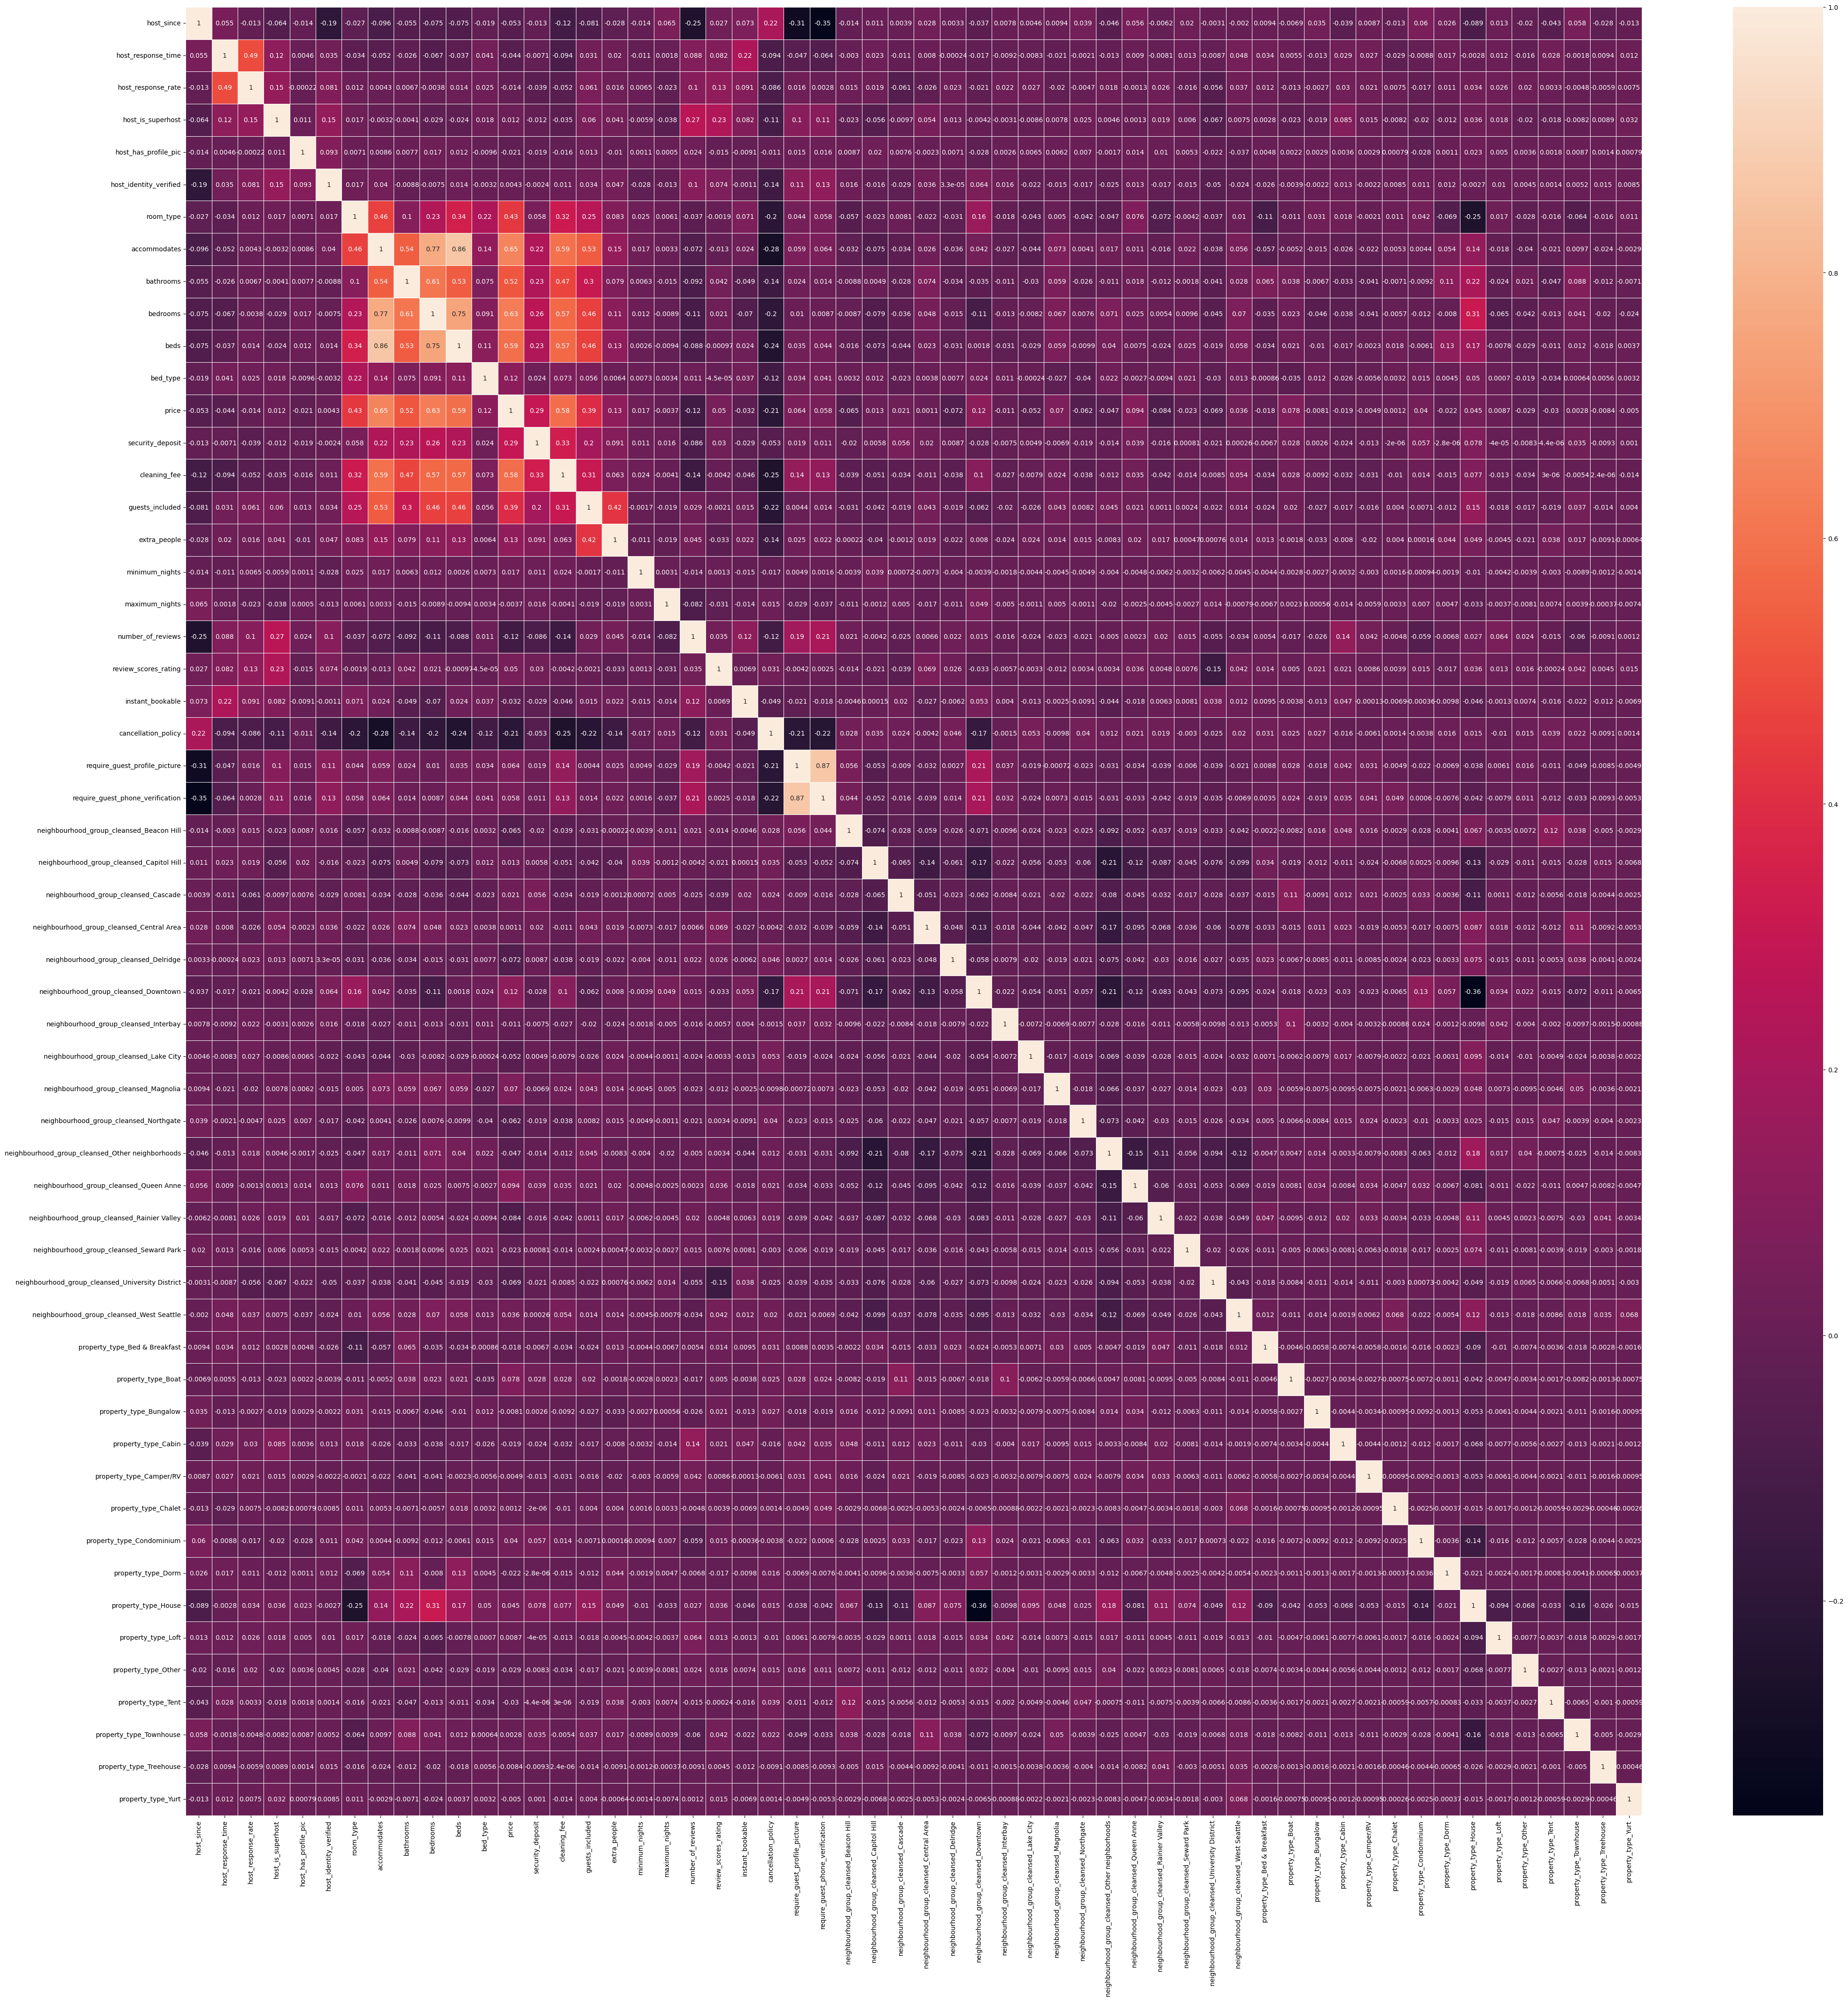

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = df.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax)
#plt.savefig("images/correlation.png")
plt.show()

##### We are not interested in all atributes, here are the attributes that are mostly related to the price

##### Here, you can see that the features that have the biggest influence on the price are the type of room, the number of people it can accommodate, the number of bathrooms, bedrooms, and beds as well as the cleaning fee

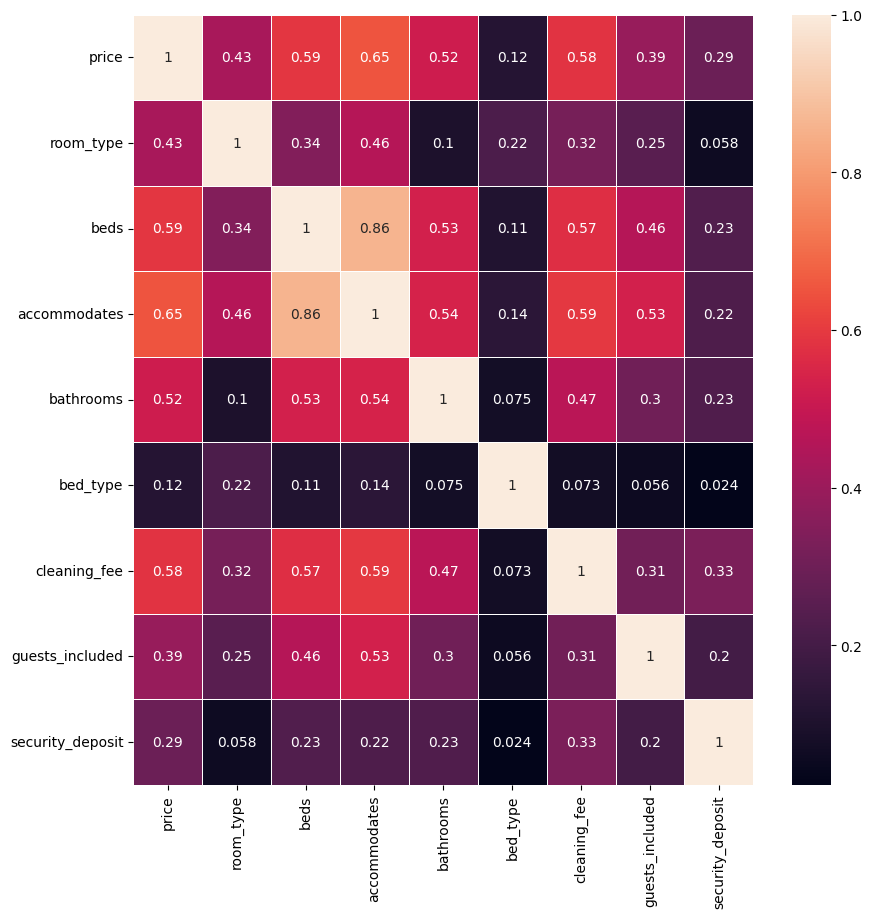

In [48]:
df_relevant = df[['price', 'room_type', 'beds', 'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee', 'guests_included', 'security_deposit']]
correlation_mat = df_relevant.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax)
#plt.savefig("images/correlation_relevant.png")
plt.show()

##